# Global Power Plant Database Project


**Problem Statement:**


**Description**

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


**Key attributes of the database.**



The database includes the following indicators:



 - country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
 - country_long (text): longer form of the country designation
 - name (text): name or title of the power plant, generally in Romanized form
 - gppd_idnr (text): 10 or 12 character identifier for the power plant
 - capacity_mw (number): electrical generating capacity in megawatts
 - latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
 - longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
 - primary_fuel (text): energy source used in primary electricity generation or export
 - other_fuel1 (text): energy source used in electricity generation or export
 - other_fuel2 (text): energy source used in electricity generation or export
 - other_fuel3 (text): energy source used in electricity generation or export
 - commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
 - owner (text): majority shareholder of the power plant, generally in Romanized form
 - source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
 - url (text): web document corresponding to the source field
 - geolocation_source (text): attribution for geolocation information
 - wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
 - year_of_capacity_data (number): year the capacity information was reported
 - generation_data_source (text): attribution for the reported generation information
 - generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
 - generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
 - generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
 - generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
 - generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
 - generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
 - generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
 - estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
 - estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
 - estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
 - estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
 - estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
 - estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
 - estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
 - estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
 - estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
 - estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 201 7  

 **Fuel Type Aggregation**



We define the "Fuel Type" attribute of our database based on common fuel categories.



**Predictions:**

1) Make two prediction for labels 1) primary_fuel
2) capacity_mw

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Importing required libraries



In [5]:
data = pd.read_csv('database_IND.csv')
data.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

There are two labels that need to be predicted. The first one is regression with the label capacity_mw and the second one is classification with the target variable primary fuel.

In [6]:
data.shape


(907, 27)

There are 908 rows and 27 columns

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are some numerical values and some categorical columns



In [61]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.



In [63]:
data.columns


Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [65]:
data.isnull().sum()


capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1              0
commissioning_year     380
owner                    0
source                   0
url                      0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In the above cell we can see that there are missing values in many columns and few even have all the 908 rows empty that will need to be removed since it provides no insights.



Column names that have more than 50% (more than 454 rows) of missing data and will need to be deleted are:



- Other_fuel1
- other_fuel2
- other_fuel3
- owner
- wepp_id
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- generation_data_source
- estimated_generation_gwh

In [71]:
data.shape


(907, 17)

Now our column numbers have been reduced to 13 from the initial value of 25.



In [73]:
data.nunique().to_frame("Unique Values")


Unique Values
capacity_mw                    361
latitude                       836
longitude                      827
primary_fuel                     8
other_fuel1                      3
commissioning_year              73
owner                          280
source                         191
url                            304
geolocation_source               3
generation_gwh_2013              0
generation_gwh_2014            371
generation_gwh_2015            396
generation_gwh_2016            403
generation_gwh_2017            408
generation_gwh_2018            410
generation_gwh_2019              0

With the help of nunique method we were able to check the unique data information present in our dataset columns.

Now observing the columns "country" and "country_long" we can see that it only has 1 unique data filled in all 908 rows and does not provide any insight so it can be deleted.

Similarly, the column "year_of_capacity_data" also has 1 single value present in it's rows and has missing data as well so it will not provide any useful information and can be deleted.

Also I see that columns "name" and "gppd_idnr" have all unique data in all the 908 rows of the dataset and being a unique identifier would help building a machine learning model either and can be deleted too.

Finally, I see that there is a column "url" which basically holds web document links and values such as those or descriptions do not really help in machine learning models and we will be deleteing it too.

Jotting down the names of columns that we will need to remove are:

- country
- country_long
- year_of_capacity_data
- name
- gppd_idnr
- url

In [78]:
print(data.shape)
data.head()

(907, 17)


capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          2.5   28.1839    73.2407             6            2   
1         98.0   24.7663    74.6090             1            2   
2         39.2   21.9038    69.3732             7            2   
3        135.0   23.8712    91.3602             2            2   
4       1800.0   21.9603    82.4091             1            2   

   commissioning_year  owner  source  url  geolocation_source  \
0              2011.0    229     109  128                   1   
1                 NaN    258     174  173                   2   
2                 NaN      2      21  205                   2   
3              2004.0      5      22   58                   2   
4              2015.0      5      22   58                   2   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

Now our new dataset has 908 rows and 7 columns after we got rid of all the useless columns post analysis from it's original number of 25.



In [9]:
data.isna().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are many null values in the data



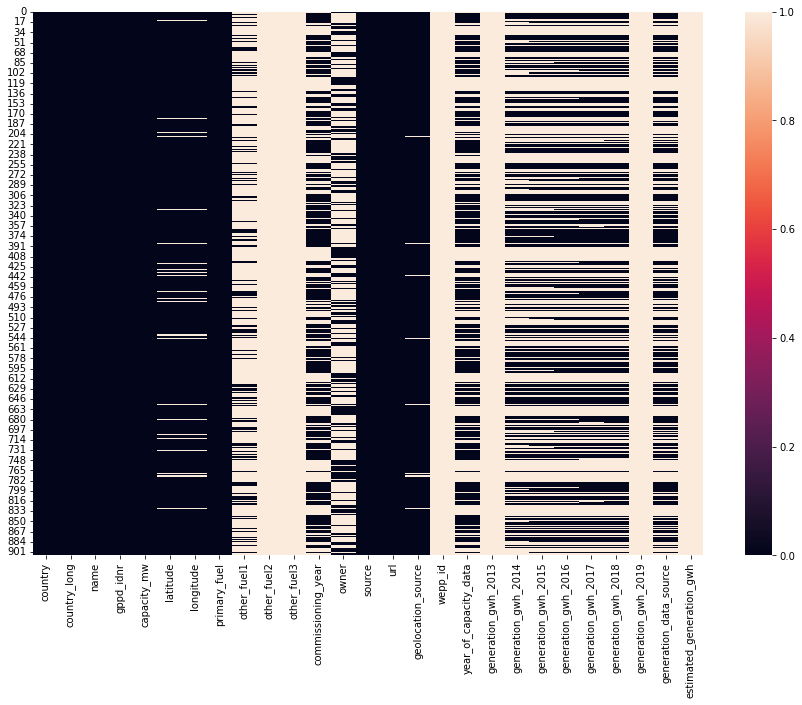

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())
plt.show()

Visualization of the null values



In [145]:
object_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  []
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']


In [11]:
data.drop(columns = ['other_fuel2', 'other_fuel3','wepp_id','estimated_generation_gwh'], axis = 1, inplace = True)


Dropping the columns that do not have any non-null value



In [13]:
data

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year  ...                    geolocation_source  \
0                2011.0  ...  National Renewable Energy Laboratory   
1                   NaN  ...                                   WRI   
2                   NaN  ...                                   WRI   
3                2004.0  ...                                   WRI   
4                2015.0  ...                                   WRI   
..                  ...  ...                                   ...   
902              2016.0  ...                                   WRI   
903                 NaN  ...                        Industry About   
904                 NaN  ...                                   WRI   
905                 NaN  ...                                   WRI   
906                 NaN  ...                                   WRI   

    year_of_capacity_data generation_gwh_2013 generation_gwh_2014  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3                  2019.0                 NaN          617.789264   
4                  2019.0                 NaN         3035.550000   
..                    ...                 ...                 ...   
902                2019.0                 NaN                 NaN   
903                   NaN                 NaN                 NaN   
904                   NaN                 NaN                 NaN   
905                   NaN                 NaN                 NaN   
906                   NaN                 NaN                 NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   


There are many null values present in the data. The columns that contain only null values will be dropped.



In [14]:
data.describe()


capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  861.000000  861.000000          527.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.239612    4.939316           17.082868   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   16.773900   74.256200         1988.000000   
50%      59.200000   21.780000   76.719500         2001.000000   
75%     385.250000   25.512400   79.440800         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count                  519.0                  0.0           398.000000   
mean                  2019.0                  NaN          2431.823590   
std                      0.0                  NaN          4026.440035   
min                   2019.0                  NaN             0.000000   
25%                   2019.0                  NaN           223.557672   
50%                   2019.0                  NaN           801.123775   
75%                   2019.0                  NaN          3035.306250   
max                   2019.0                  NaN         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           422.000000           434.000000           440.000000   
mean           2428.226946          2467.936859          2547.759305   
std            4194.596959          4162.884308          4196.991169   
min               0.000000             0.000000             0.000000   
25%             176.381063           188.285252           177.874930   
50%             711.181225           737.205450           817.977250   
75%            3084.121250          3282.861313          3275.690475   
max           30539.000000         30015.000000         35116.000000   

       generation_gwh_2018  generation_gwh_2019  
count           448.000000                  0.0  
mean           2600.804099                  NaN  
std            4314.880456                  NaN  
min               0.000000                  NaN  
25%             193.378250                  NaN  
50%             751.644375                  NaN  
75%            3143.535900                  NaN  
max           35136.000000                  NaN

In [15]:
data.drop(columns = ['year_of_capacity_data'], inplace = True)


Dropping the year of capacity data from the dataset



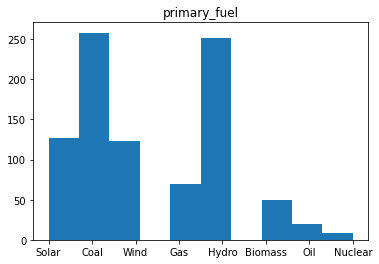

In [16]:
#HISTOGRAM

data['primary_fuel'].hist(grid = False)
plt.title('primary_fuel')
plt.show()

The representation of the column primary fuel as it is one the target variable

There is class imbalance in this data

Very high skewness in the column capacity_mw

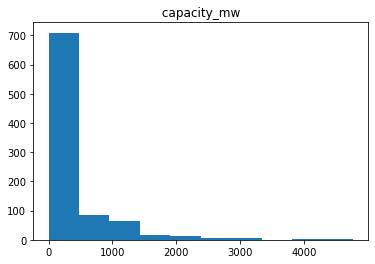

In [17]:
#HISTOGRAM

data['capacity_mw'].hist(grid = False)
plt.title(' capacity_mw ')
plt.show()

The visual representation of the capacity_mw column, there is high skewness



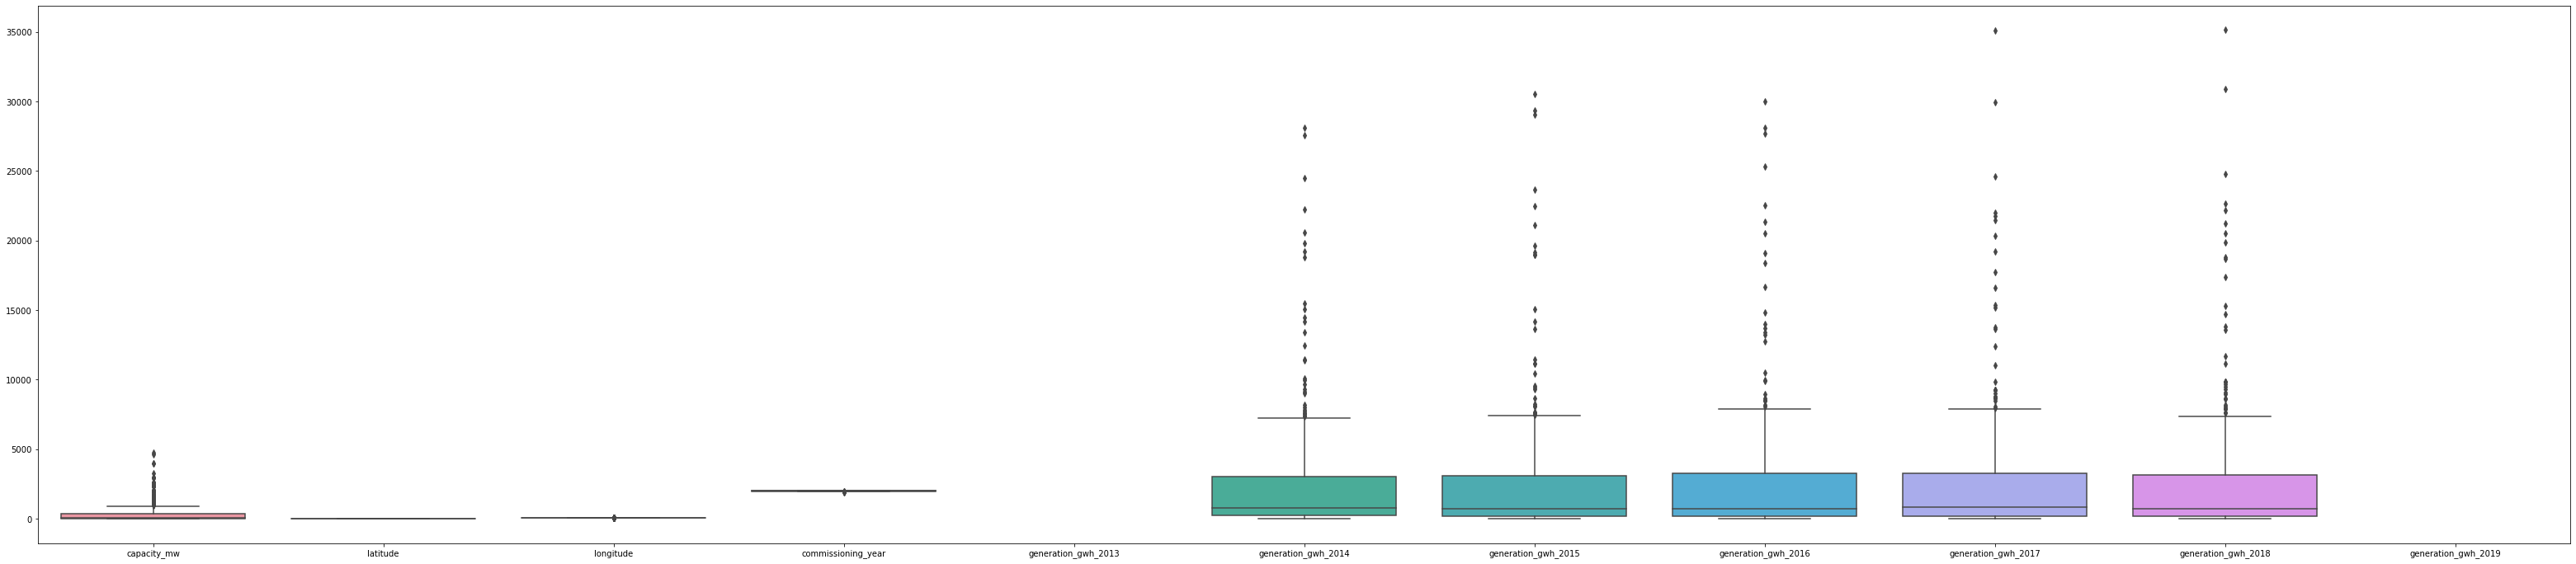

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(data = data, ax=ax)
plt.show()


The boxplot shows that there are many outliers



array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:title={'center':'generation_gwh_2019'}>,
        <AxesSubplot:>]], dtype=object)

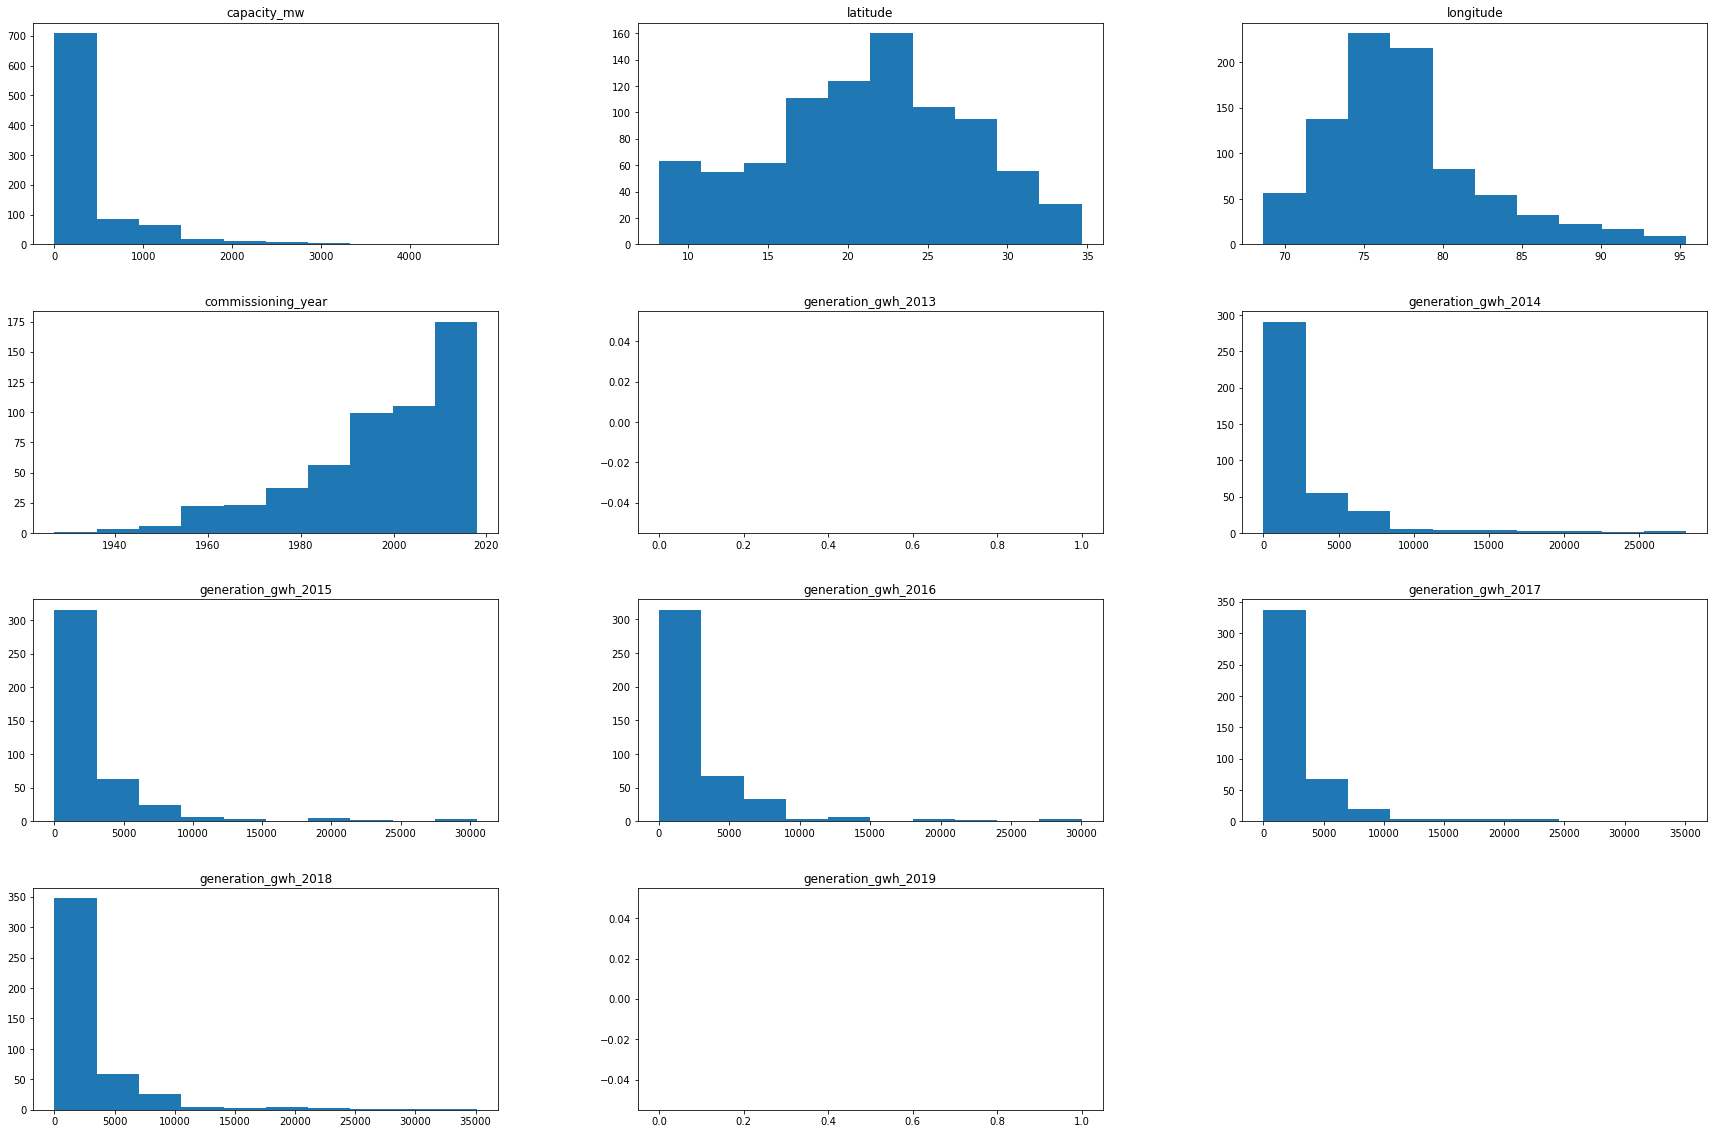

In [19]:
data.hist(figsize = (30,20), grid = False)


The data is now less skewed and more towards normal distribution.



<AxesSubplot:>

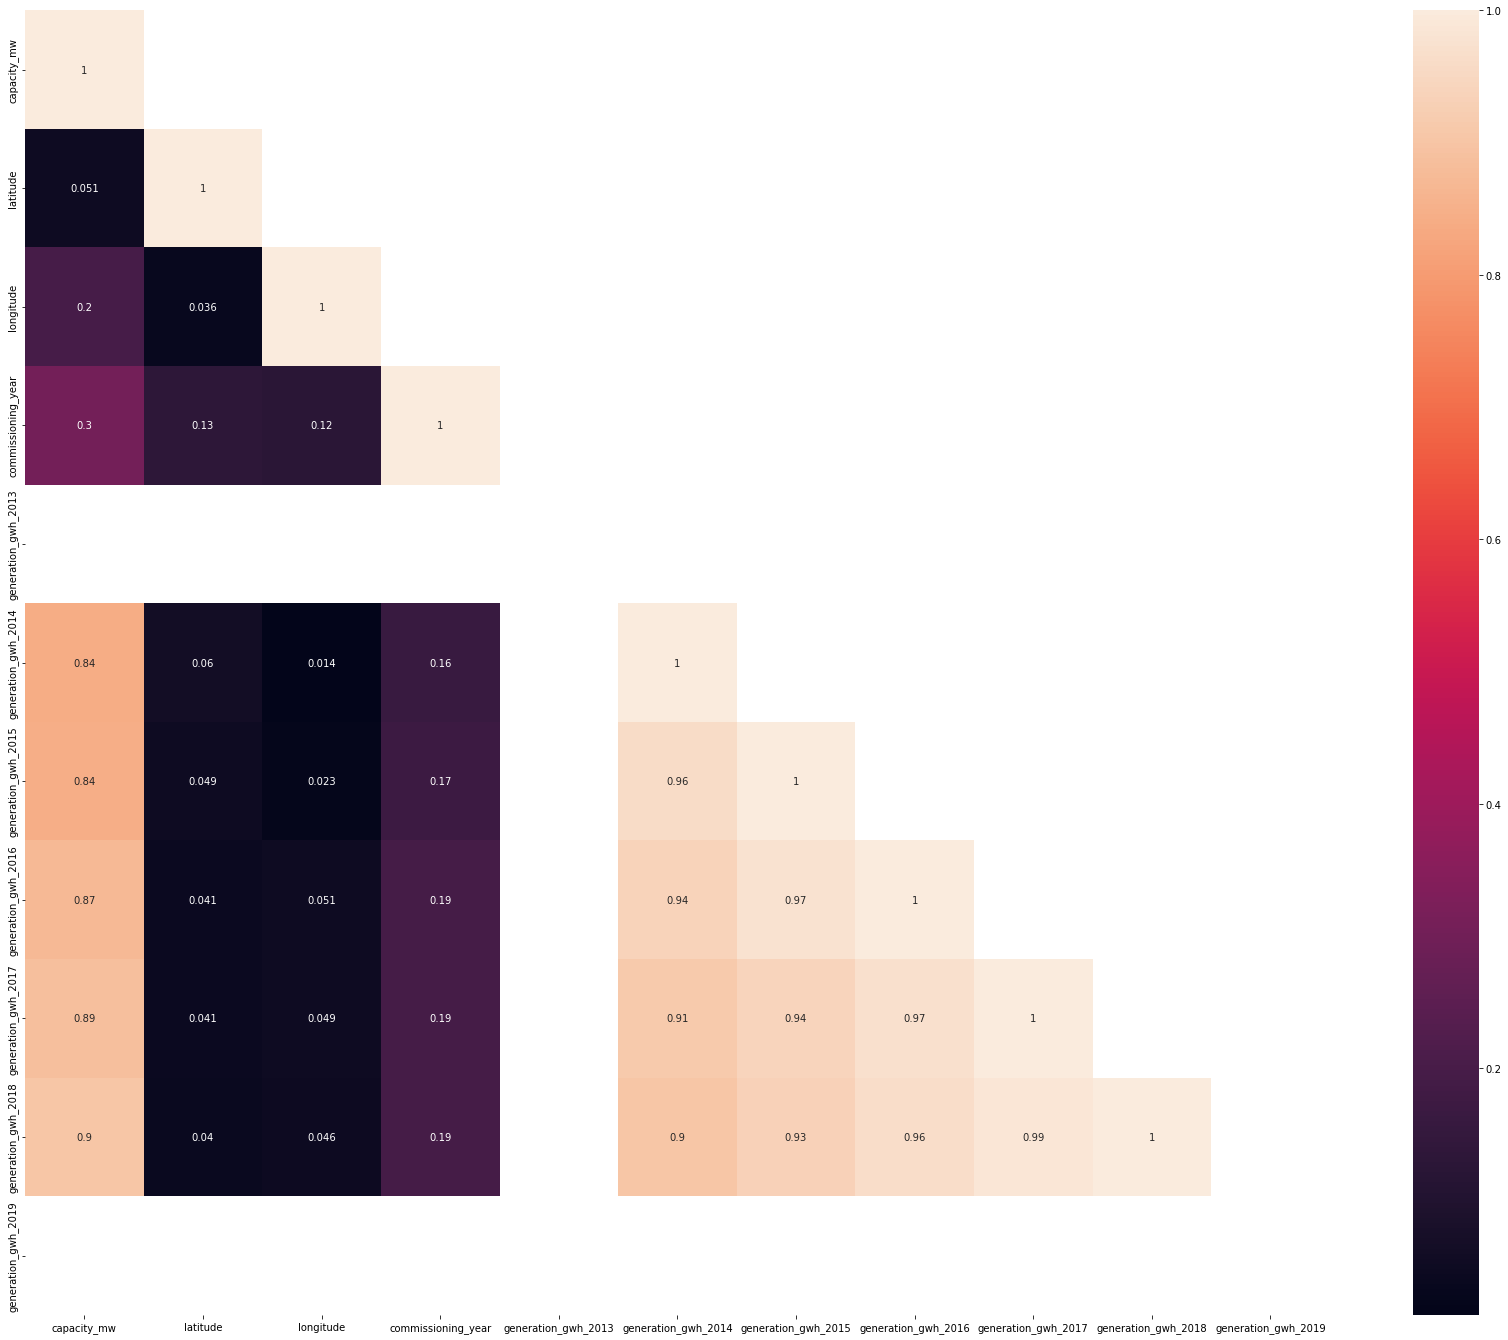

In [20]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

It appears that there is high multicollinearity between certain columns.



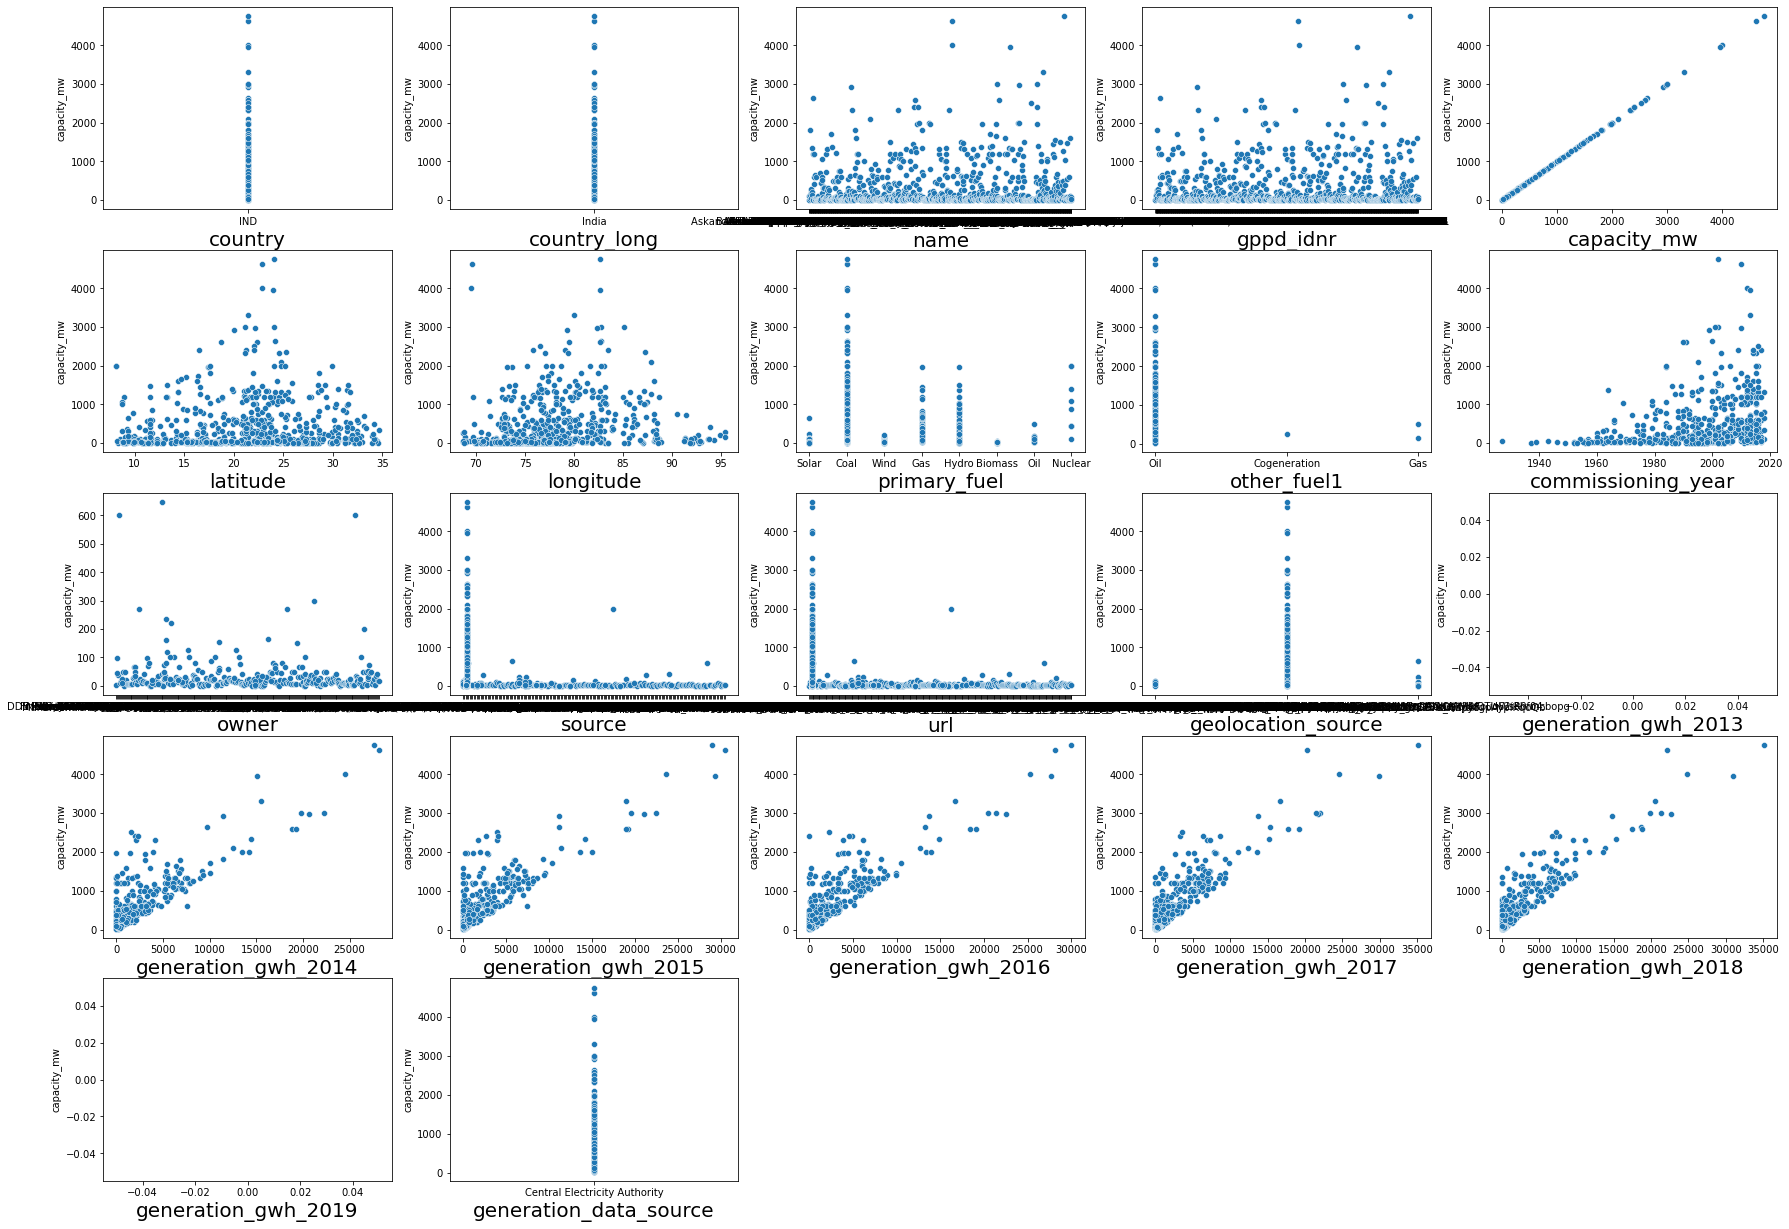

In [21]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data[column], y = 'capacity_mw', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Scatter plot shows that there does not exist relationship between capacity_mw and some variables. We will drop those variables



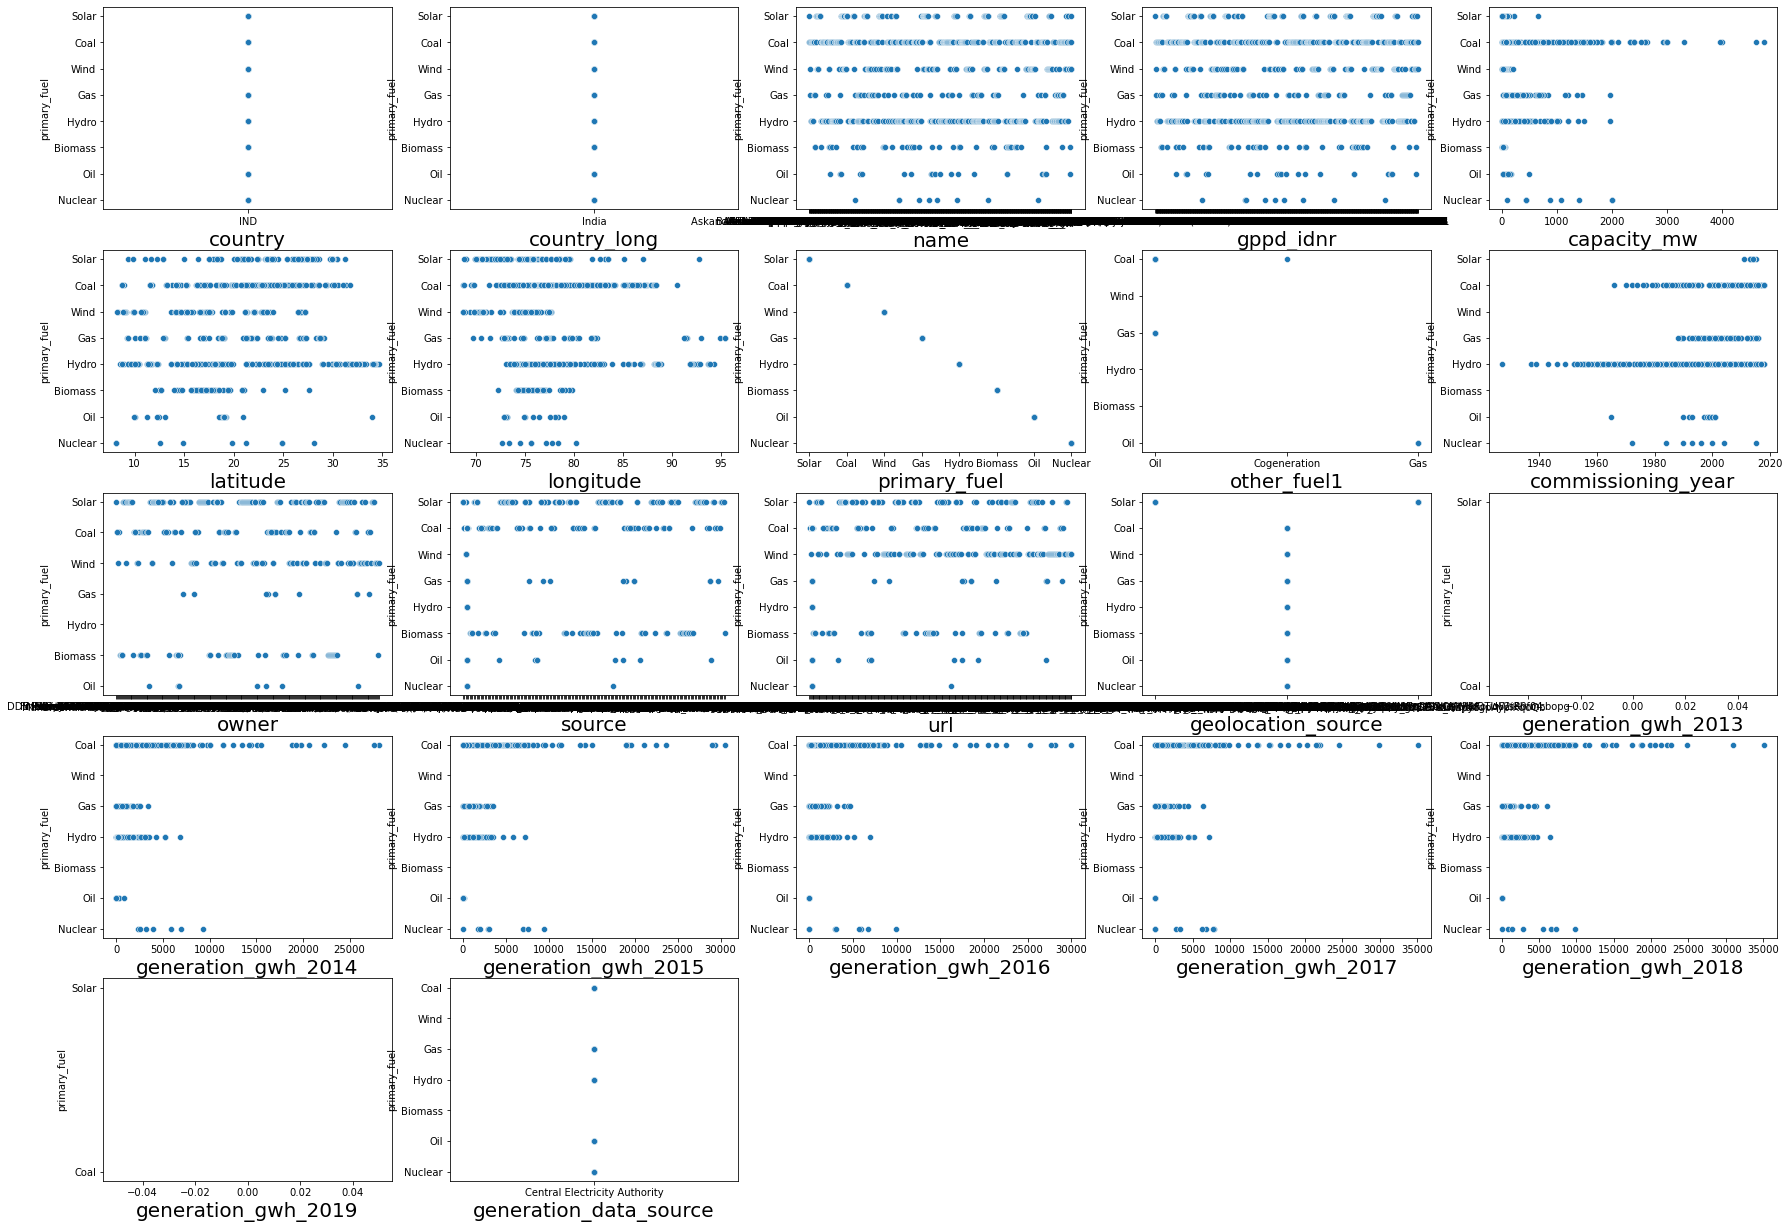

In [22]:
plt.figure(figsize = (30,35))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data[column], y = 'primary_fuel', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Some variable do not have any relationship with primary_fuel



In [23]:
data.skew()


capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

There is high skewness in some variables



<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

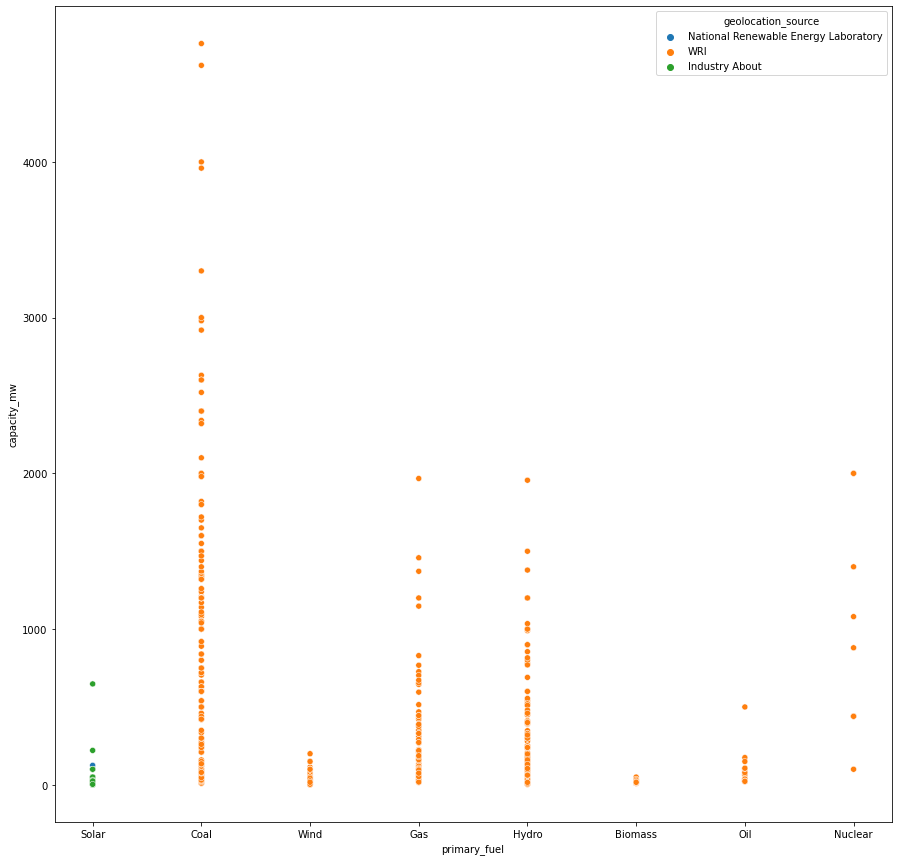

In [24]:
fig,axes=plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(x='primary_fuel',y='capacity_mw',hue='geolocation_source',data=data)

The scatter plot shows the relationship between capacity_mw and primary_level



In [25]:
data['generation_data_source'].value_counts()


Central Electricity Authority    449
Name: generation_data_source, dtype: int64

There is only a single entry in generation_data_source. It will not help in prediction, so it is better to drop it.



In [26]:
data.drop(columns = ['generation_data_source'], axis = 1, inplace = True)


Dropped the column



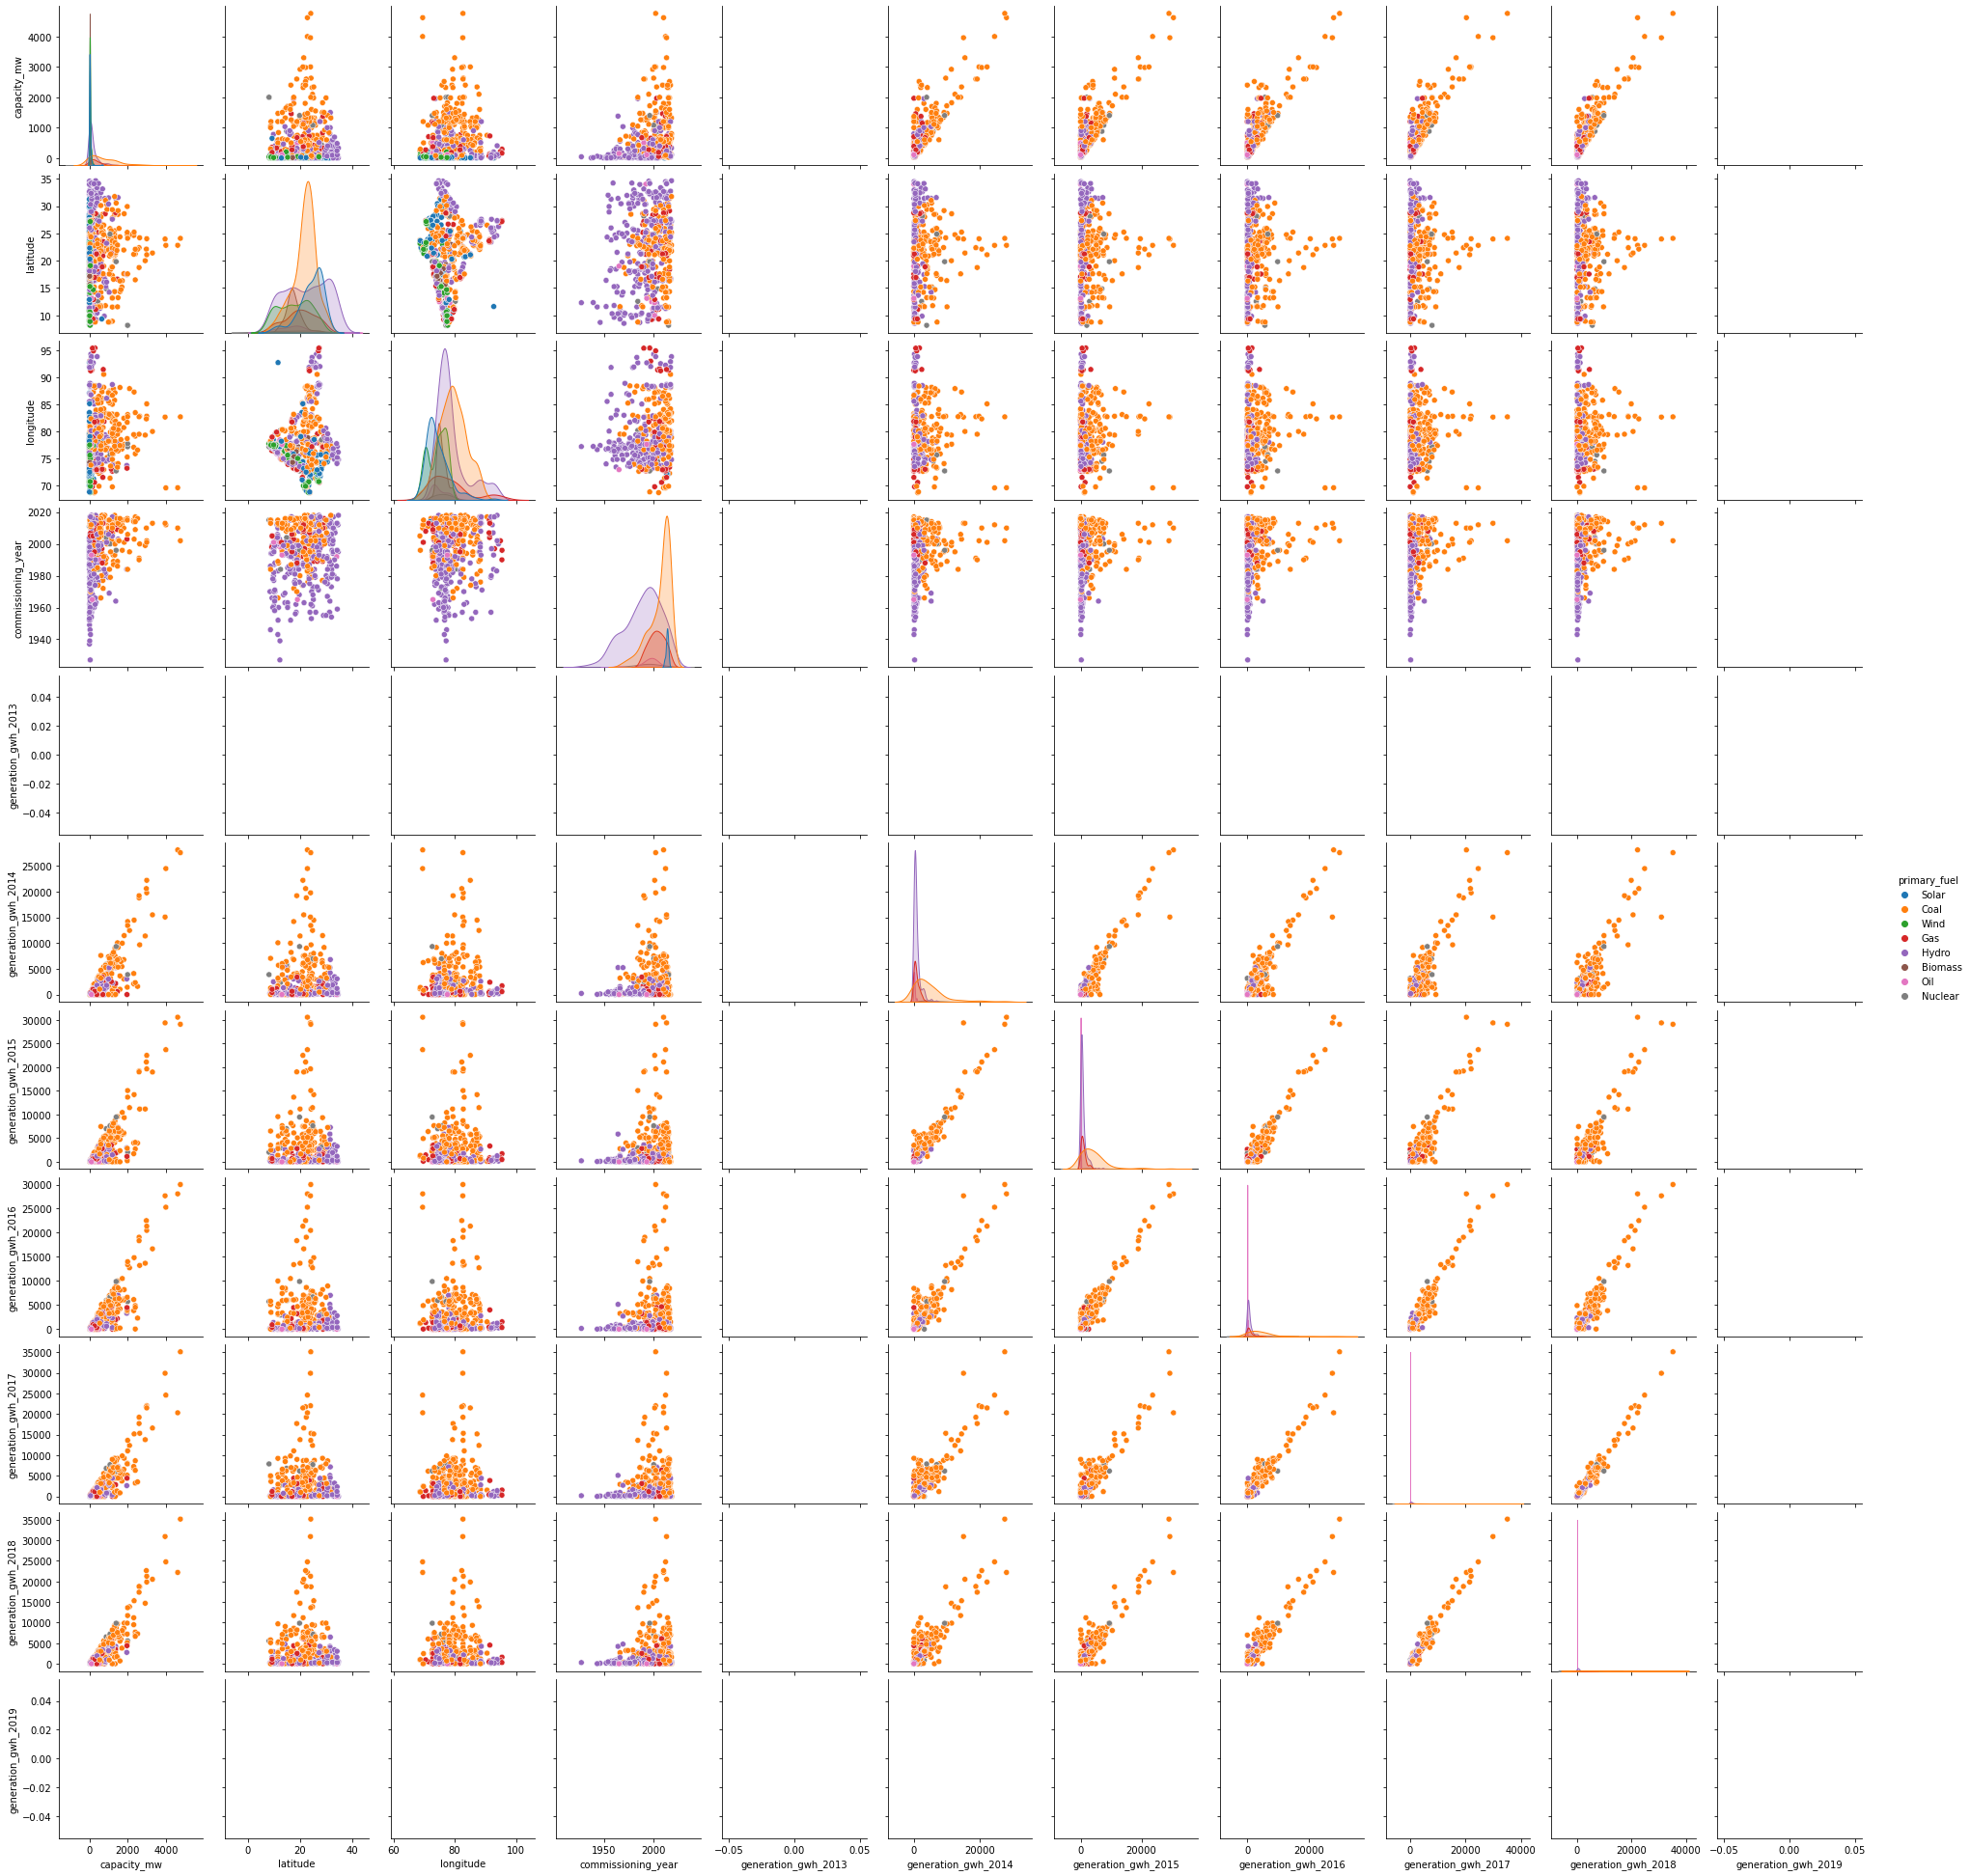

In [27]:
sns.pairplot(data, hue = 'primary_fuel')


Pairplot shows that coal is associated with the high capacity.



In [29]:
#Dealing with null values

from sklearn.impute import KNNImputer
knn_ipm = KNNImputer(n_neighbors = 3)
data_filled = knn_ipm.fit_transform(data[['latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017']])

data1 = pd.DataFrame(data_filled)

Dealt with null values using KNNImputer



In [83]:
object_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype) 

Object Data Type Columns are:  []
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']


In [85]:
# filling missing data for continous values with mean
data["latitude"].fillna(data["latitude"].mean(),inplace=True)
data["longitude"].fillna(data["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
data["commissioning_year"].fillna(data["commissioning_year"].mode()[0],inplace=True)
data["geolocation_source"].fillna(data["geolocation_source"].mode()[0],inplace=True)

Since we had to take care of the missing data I have chosen to fill the null values in continous data column with it's mean and the null values for categorical data column with it's mode information.



In [38]:
data['country'].value_counts()


IND    907
Name: country, dtype: int64

There is a single country, so it is better to drop it



In [39]:
data['country_long'].value_counts()


India    907
Name: country_long, dtype: int64

There is a single country long, so it is better to drop it



In [40]:
data['name'].value_counts()


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

There are different names for each row, so it is better to drop it



In [41]:
data['gppd_idnr'].value_counts()


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [86]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

There are different gppd_idnr for each row, so it is better to drop it



In [42]:
data.drop(columns = ['gppd_idnr','name', 'country_long','country'], axis = 1, inplace = True)


dropped the columns



In [43]:
#Treating the outliers

# findingout the quantile of data with continuous columns
col = data.drop(columns = ['primary_fuel','other_fuel1','owner','source','url','geolocation_source'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = col[~((col < (Q1 -  1.5*IQR)) |(col > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (907, 11)
shape after          : (741, 11)
Percentage Loss      : 0.18302094818081588


We can't apply this method, as we are losing 22% data



In [44]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

Applies label encoder



In [45]:
a = lab_enc.fit_transform(data['primary_fuel'])
b = lab_enc.fit_transform(data['other_fuel1'])
c = lab_enc.fit_transform(data['owner'])
d = lab_enc.fit_transform(data['source'])
e = lab_enc.fit_transform(data['url'])
f = lab_enc.fit_transform(data['geolocation_source'])

Fitted the data



In [46]:
data['primary_fuel'] = a
data['other_fuel1'] = b
data['owner'] = c
data['source'] = d
data['url'] = e 
data['geolocation_source'] = f
data

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407             6            2   
1           98.0   24.7663    74.6090             1            2   
2           39.2   21.9038    69.3732             7            2   
3          135.0   23.8712    91.3602             2            2   
4         1800.0   21.9603    82.4091             1            2   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568             1            2   
903          3.0   12.8932    78.1654             6            2   
904         25.5   15.2758    75.5811             7            2   
905         80.0   24.3500    73.7477             1            2   
906         16.5    9.9344    77.4768             7            2   

     commissioning_year  owner  source  url  geolocation_source  \
0                2011.0    229     109  128                   1   
1                   NaN    258     174  173                   2   
2                   NaN      2      21  205                   2   
3                2004.0      5      22   58                   2   
4                2015.0      5      22   58                   2   
..                  ...    ...     ...  ...                 ...   
902              2016.0      5      22   58                   2   
903                 NaN    114      77   22                   0   
904                 NaN      5      21  260                   2   
905                 NaN     91      59   82                   2   
906                 NaN    279      21  245                   2   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                    NaN           617.789264           843.747000   
4                    NaN          3035.550000          5916.370000   
..                   ...                  ...                  ...   
902                  NaN                  NaN             0.994875   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             886.004428           663.774500           626.239128   
4            6243.000000          5385.579736          7279.000000   
..                   ...                  ...                  ...   
902           233.596650           865.400000           686.500000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2019  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
..                   ...  
902                  NaN  
903                  NaN  
904                  NaN  
905                  NaN  
906                  NaN  

[907 rows x 17 columns]

Substituted the value and reading the data



array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>],
       [<AxesSubplot:title={'center':'other_fuel1'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'owner'}>,
        <AxesSubplot:title={'center':'source'}>],
       [<AxesSubplot:title={'center':'url'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2019'}>,
        <AxesSubplot:>, <AxesSu

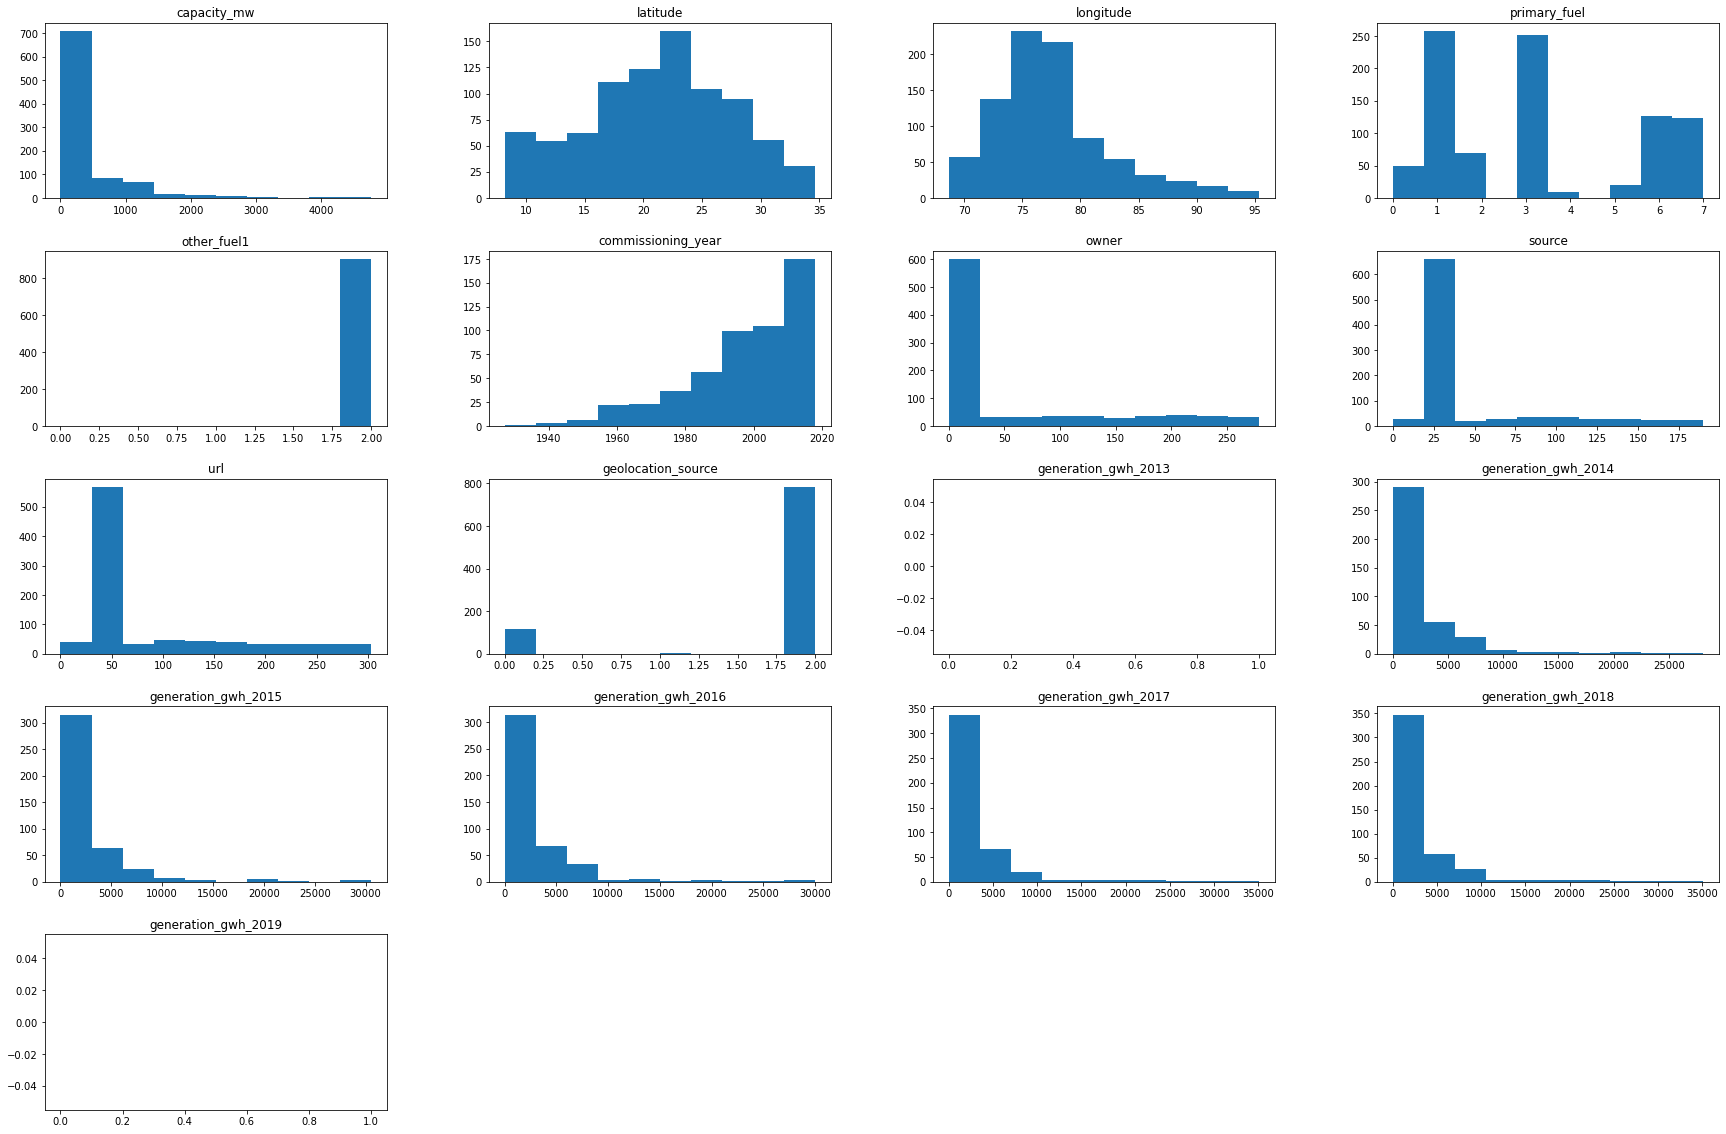

In [47]:
data.hist(figsize = (30,20), grid = False)


The data is now less skewed



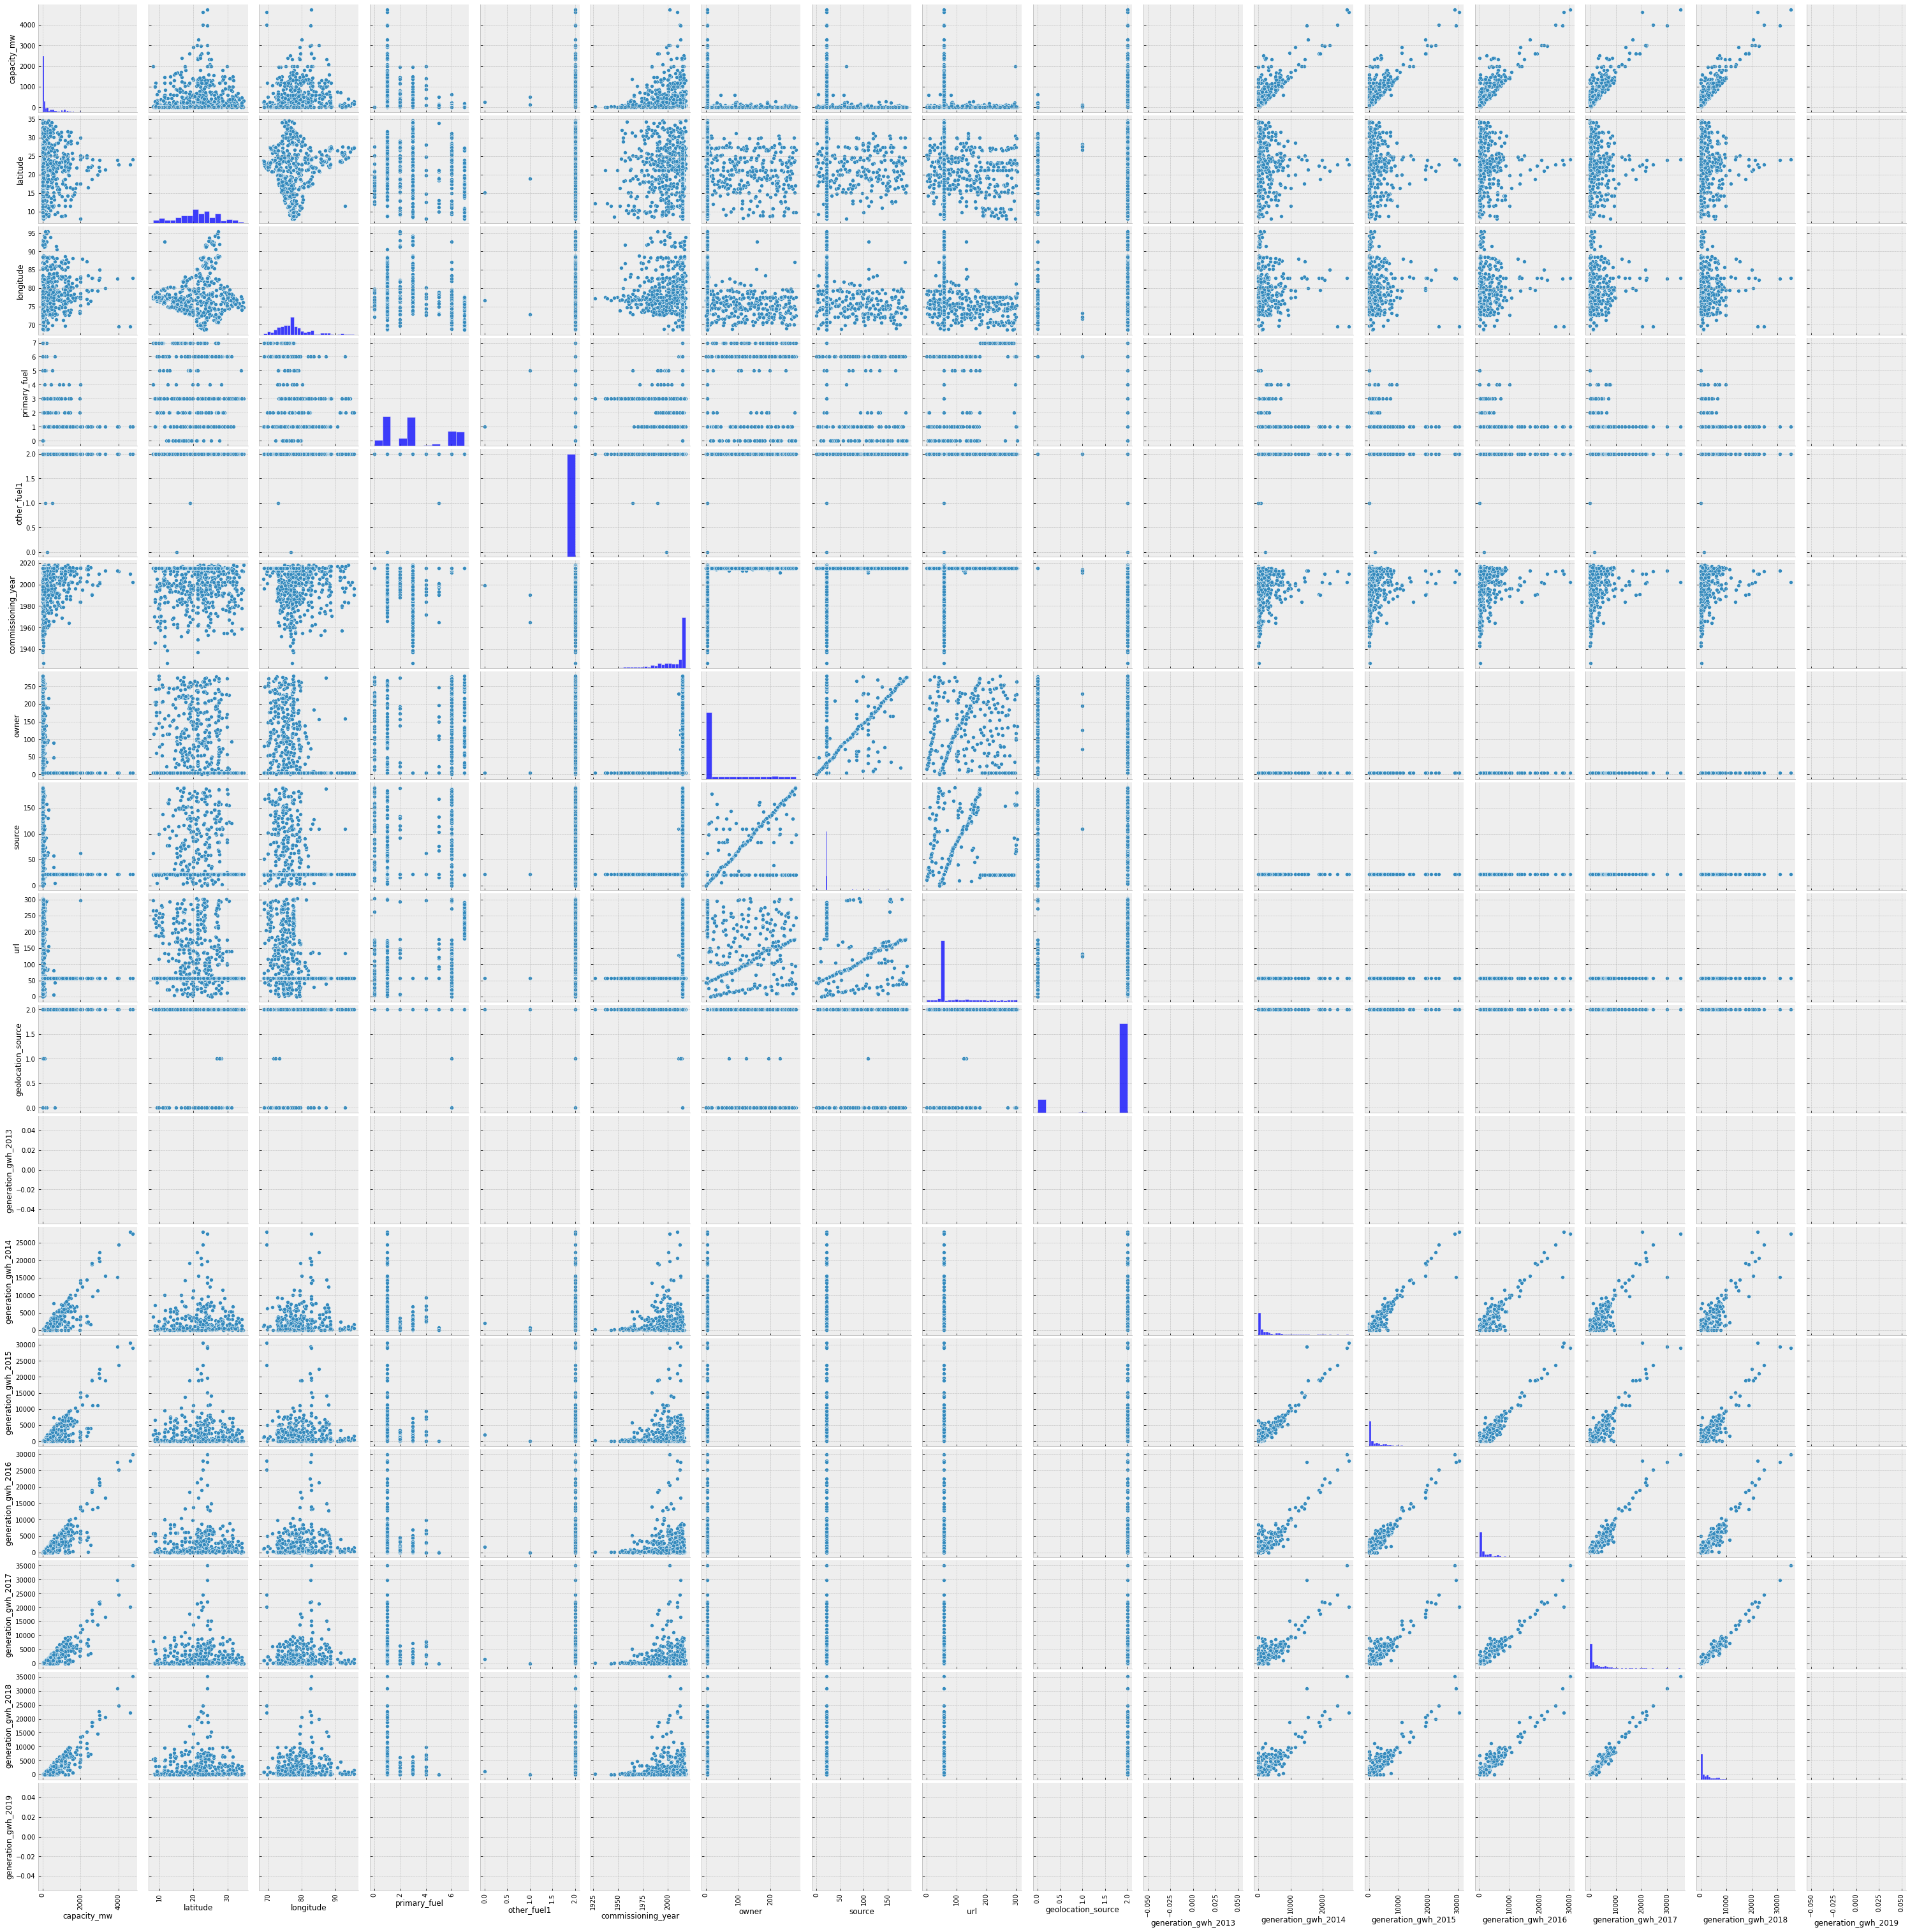

In [88]:
plt.style.use('bmh')
g = sns.pairplot(data)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

From the above pair plot we can see the data distribution amongst the numerical data type columns.



# Model with Target Variable: primary_fuel



In [48]:
y1 = data['primary_fuel']
x1 = data.drop(['primary_fuel'],axis = 1)

Splitting the data



Dealing with the problem of class imbalance




In [92]:
le = LabelEncoder()
data["primary_fuel"] = le.fit_transform(data["primary_fuel"])
data.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          2.5   28.1839    73.2407             6            2   
1         98.0   24.7663    74.6090             1            2   
2         39.2   21.9038    69.3732             7            2   
3        135.0   23.8712    91.3602             2            2   
4       1800.0   21.9603    82.4091             1            2   

   commissioning_year  owner  source  url  geolocation_source  \
0              2011.0    229     109  128                   1   
1              2015.0    258     174  173                   2   
2              2015.0      2      21  205                   2   
3              2004.0      5      22   58                   2   
4              2015.0      5      22   58                   2   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

I am using Label Encoder on our target column "primary_fuel" since we want our labels to be converted from the object datatype to numerical datatype.



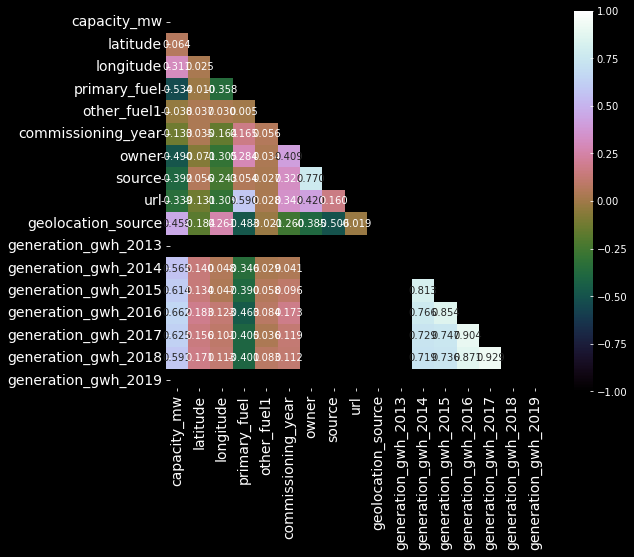

In [149]:
upper_triangle = np.triu(data.corr())
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In the above heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.

# Correlation Bar Plot comparing features with our labels


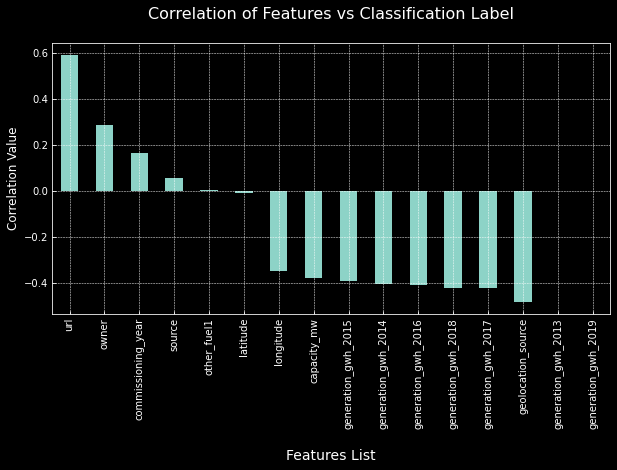

In [99]:
plt.style.use('dark_background')
data_corr = data.corr()
plt.figure(figsize=(10,5))
data_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.

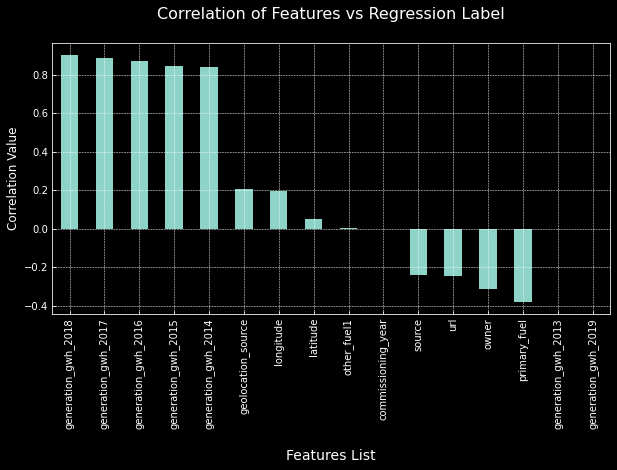

In [100]:
data_corr = data.corr()
plt.figure(figsize=(10,5))
data_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.

# Using Z Score to remove outliers


# Using Log Transform to fix skewness


In [108]:
for col in float_datatype:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

Converted the data in the series



I have applied Log Transformation on our numerical float datatype columns to ensure that we do not have skewness in our dataset.



# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [109]:
X = data.drop('primary_fuel', axis=1)
Y = data['primary_fuel']

I have bifurcated the dataset into features and classification label where X represents all the feature columns and Y represents the classification target label column.



# Resolving the class imbalance issue in our label column


In [110]:
Y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Listing the values of our classification label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

# Feature Scaling


In [152]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

latitude  longitude  primary_fuel  other_fuel1  commissioning_year  \
0  1.149805  -0.899131      1.225688     0.054303            0.407327   
1  0.587311  -0.592393     -0.967877     0.054303            0.661679   
2  0.116179  -1.797707      1.664401     0.054303            0.661679   
3  0.439989   2.768797     -0.529164     0.054303           -0.037788   
4  0.125479   1.056654     -0.967877     0.054303            0.661679   

      owner    source       url  geolocation_source  generation_gwh_2013  \
0  2.095328  1.460215  0.476673           -1.083349                  NaN   
1  2.446913  2.917019  1.116401            0.394241                  NaN   
2 -0.656734 -0.512075  1.571318            0.394241                  NaN   
3 -0.620363 -0.489662 -0.518459            0.394241                  NaN   
4 -0.620363 -0.489662 -0.518459            0.394241                  NaN   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.046691             0.205605             0.216924   
4             0.710879             1.013547             1.025762   

   generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3             0.086986             0.070416                  NaN  
4             0.935281             1.040254                  NaN

I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Machine Learning Model for Classification with Evaluation Metrics


In [153]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [154]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

After comparing all the classification models I have selected Extra Trees Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. The reason behind selecting Extra Trees Classifier is because it got the highest accuracy score plus the cross validation score was even better for this model.

In [155]:
X = data.drop('capacity_mw', axis=1)
Y = data['capacity_mw']

In [156]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output

latitude  longitude  primary_fuel  other_fuel1  commissioning_year  \
0  1.149805  -0.899131      1.225688     0.054303            0.407327   
1  0.587311  -0.592393     -0.967877     0.054303            0.661679   
2  0.116179  -1.797707      1.664401     0.054303            0.661679   
3  0.439989   2.768797     -0.529164     0.054303           -0.037788   
4  0.125479   1.056654     -0.967877     0.054303            0.661679   

      owner    source       url  geolocation_source  generation_gwh_2013  \
0  2.095328  1.460215  0.476673           -1.083349                  NaN   
1  2.446913  2.917019  1.116401            0.394241                  NaN   
2 -0.656734 -0.512075  1.571318            0.394241                  NaN   
3 -0.620363 -0.489662 -0.518459            0.394241                  NaN   
4 -0.620363 -0.489662 -0.518459            0.394241                  NaN   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.046691             0.205605             0.216924   
4             0.710879             1.013547             1.025762   

   generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3             0.086986             0.070416                  NaN  
4             0.935281             1.040254                  NaN

# Completed